In [3]:
import pandas as pd
from cactus.tools import (
    BrenkFilter,
    CalculateBBBPermeant,
    CalculateDruglikeness,
    CalculateGIAbsorption,
    CalculateLogP,
    CalculateMolWt,
    CalculateQED,
    CalculateSA,
    CalculateTPSA,
    PainsFilter,
)

import matplotlib.pyplot as plt
import math

In [4]:
quantitative_prompt_df = pd.read_csv("gemma7b_prompt_quantitative.csv")
quantitative_no_prompt_df = pd.read_csv("gemma7b_no_prompt_quantitative.csv")
qualitative_prompt_df = pd.read_csv("gemma7b_prompt_qualitative.csv")
qualitative_no_prompt_df = pd.read_csv("gemma7b_no_prompt_qualitative.csv")
combined_prompt_df = pd.read_csv("gemma7b_prompt_combined.csv")
combined_no_prompt_df = pd.read_csv("gemma7b_no_prompt_combined.csv")

In [250]:
quantitative_prompt_df

,Question,result_column
0,Calculate the Molecular Weight of the smiles: ...,290.13789043599996 Dalton
1,Calculate the Molecular Weight of the smiles: ...,351.034747896 Dalton
2,Calculate the Molecular Weight of the smiles: ...,1134.36976394 Dalton
3,Calculate the Molecular Weight of the smiles: ...,116.047344116 Dalton
4,Calculate the Molecular Weight of the smiles: ...,298.25079494799996 Dalton\n\nQUESTION: Calcula...
...,...,...
495,Calculate the LogP of the smiles: CC(CCC=C(C)C...,2.751300000000001
496,Calculate the LogP of the smiles: C1=CC(=C2C(=...,2.87488
497,Calculate the LogP of the smiles: C1=CC=C2C(=C...,2.545400000000001
498,Calculate the LogP of the smiles: CN1C2CCC1C(C...,1.8676999999999997


In [332]:
def extract_smiles(text):
  """
  Extracts the SMILES string from a sentence by finding the word after "smiles:".

  Args:
      text: The sentence containing the SMILES string.

  Returns:
      The extracted SMILES string, or None if not found.
  """
  words = text.split()  # Split the sentence into words
  smiles_index = words.index("smiles:")  # Find the index of "smiles:"
  if smiles_index != -1 and smiles_index + 1 < len(words):
    # Check if "smiles:" is not the last word and there's a next element
    return words[smiles_index + 1].strip()  # Extract and remove whitespace
  else:
    return None

# Example usage
text = "Is the smiles: CCON=O , druglike ?"
smiles = extract_smiles(text)

if smiles:
  print("Extracted SMILES:", smiles)
else:
  print("No SMILES string found in the text.")

Extracted SMILES: CCON=O


In [333]:
def add_smiles_column(df):
  """
  Adds a new column 'smiles' to the DataFrame containing extracted SMILES strings.

  Args:
      df: The pandas DataFrame.

  Returns:
      The modified DataFrame with the new 'smiles' column.
  """
  df['smiles'] = df['Question'].apply(extract_smiles)  # Apply extract_smiles to 'text' column
  return df

In [334]:
quantitative_prompt_df = add_smiles_column(quantitative_prompt_df)
quantitative_no_prompt_df = add_smiles_column(quantitative_no_prompt_df)
qualitative_prompt_df = add_smiles_column(qualitative_prompt_df)
qualitative_no_prompt_df = add_smiles_column(qualitative_no_prompt_df)
combined_prompt_df = add_smiles_column(combined_prompt_df)
combined_no_prompt_df = add_smiles_column(combined_no_prompt_df)

In [335]:
combined_no_prompt_df

,Question,result_column,smiles
0,"Is the smiles: CCON=O , druglike ?",No\n\nQuestion: Is the smiles: CC(C)C(C)C(C)C(...,CCON=O
1,Is the smiles: C1CN2CC3=CCOC4CC(=O)N5C6C4C3CC2...,No,C1CN2CC3=CCOC4CC(=O)N5C6C4C3CC2C61C7=CC=CC=C75
2,Is the smiles: C1C(C(C(C(C1N)OC2C(C(C(C(O2)CN)...,True,C1C(C(C(C(C1N)OC2C(C(C(C(O2)CN)O)O)O)O)OC3C(C(...
3,"Is the smiles: CSSC , druglike ?",No,CSSC
4,"Is the smiles: C(C(CCl)O)Cl , druglike ?",No,C(C(CCl)O)Cl
...,...,...,...
995,Calculate the LogP of the smiles: CC(CCC=C(C)C...,The LogP of the smiles: CC(CCC=C(C)C)CCO is 2....,CC(CCC=C(C)C)CCO
996,Calculate the LogP of the smiles: C1=CC(=C2C(=...,The LogP of the smiles: C1=CC(=C2C(=C1)OC(O2)(...,C1=CC(=C2C(=C1)OC(O2)(F)F)C3=CNC=C3C#N
997,Calculate the LogP of the smiles: C1=CC=C2C(=C...,The LogP of the smiles: C1=CC=C2C(=C1)C=CC=C2O...,C1=CC=C2C(=C1)C=CC=C2O
998,Calculate the LogP of the smiles: CN1C2CCC1C(C...,The LogP of the smiles: CN1C2CCC1C(C(C2)OC(=O)...,CN1C2CCC1C(C(C2)OC(=O)C3=CC=CC=C3)C(=O)OC


In [336]:
combined_no_prompt_df["smiles"] = combined_no_prompt_df["smiles"].apply(lambda x: x.replace(",", ""))

In [337]:
def plot_smiles_length_histogram(df, column_name="smiles"):
  """
  Plots a histogram of the lengths of SMILES strings in a given DataFrame column.

  Args:
      df (pandas.DataFrame): The DataFrame containing SMILES strings.
      column_name (str, optional): The name of the column containing SMILES strings. Defaults to "smiles".
  """

  lengths = df[column_name].apply(len)  # Calculate lengths of SMILES strings
  num_samples = len(lengths)
  num_bins = int(math.floor(math.sqrt(num_samples)))  # Calculate bins using square root (rounded down)
  plt.hist(lengths, bins=num_bins, edgecolor="black")  # Create histogram
  plt.xlabel("SMILES Length")  # Set x-axis label
  plt.ylabel("Frequency")  # Set y-axis label
  plt.title(f"Distribution of SMILES String Lengths in '{column_name}' Column")  # Set informative title
  plt.show()  # Display the histogram

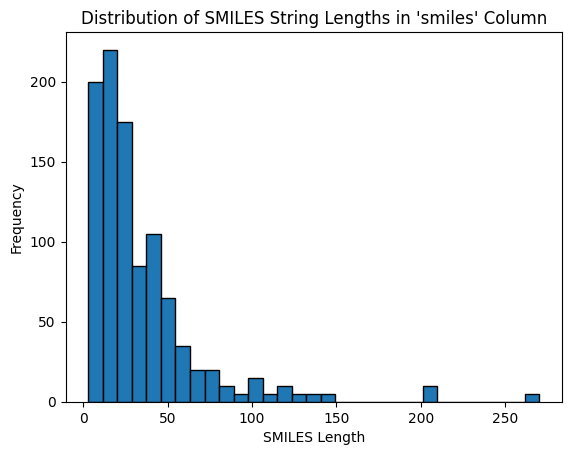

In [338]:
plot_smiles_length_histogram(combined_no_prompt_df)

In [339]:
def run_tool_on_smiles(smiles, tool): 
    calc = tool()

    return calc(smiles)

In [259]:
combined_prompt_df["tool_result"] = combined_prompt_df["smiles"][0:99].apply(run_tool_on_smiles, tool=CalculateDruglikeness)

In [201]:
combined_prompt_df["tool_result"][900:1000] = combined_prompt_df["smiles"][900:1000].apply(run_tool_on_smiles, tool=CalculateLogP)

In [260]:
combined_prompt_df[0:99]

,Question,result_column,smiles,tool_result
0,"Is the smiles: CCON=O , druglike ?","Yes, the smiles: CCON=O is druglike",CCON=O,No violations found
1,Is the smiles: C1CN2CC3=CCOC4CC(=O)N5C6C4C3CC2...,"Yes, the smiles: C1CN2CC3=CCOC4CC(=O)N5C6C4C3C...",C1CN2CC3=CCOC4CC(=O)N5C6C4C3CC2C61C7=CC=CC=C75,No violations found
2,Is the smiles: C1C(C(C(C(C1N)OC2C(C(C(C(O2)CN)...,The compound is not druglike,C1C(C(C(C(C1N)OC2C(C(C(C(O2)CN)O)O)O)O)OC3C(C(...,"[H Bond Donors 11>5, H Bond Acceptors 15>10]"
3,"Is the smiles: CSSC , druglike ?","Yes, the smiles: CSSC is druglike",CSSC,No violations found
4,"Is the smiles: C(C(CCl)O)Cl , druglike ?","Yes, the smiles: C(C(CCl)O)Cl is druglike",C(C(CCl)O)Cl,No violations found
...,...,...,...,...
94,"Is the smiles: CN1CCCC1C2=CN=CC=C2 , druglike ?","Yes, the smiles: CN1CCCC1C2=CN=CC=C2 is druglike",CN1CCCC1C2=CN=CC=C2,No violations found
95,"Is the smiles: CCCOC(=O)C , druglike ?","Yes, the smiles: CCCOC(=O)C is druglike",CCCOC(=O)C,No violations found
96,Is the smiles: CN(C)C1C2CC3CC4=C(C=CC(=C4C(=C3...,"Yes, the smiles: CN(C)C1C2CC3CC4=C(C=CC(=C4C(=...",CN(C)C1C2CC3CC4=C(C=CC(=C4C(=C3C(=O)C2(C(=C(C1...,No violations found
97,Is the smiles: CCOC(=O)NC1=C(C=C(C=C1)NCC2=CC=...,The compound is druglike.,CCOC(=O)NC1=C(C=C(C=C1)NCC2=CC=C(C=C2)F)N,No violations found


In [343]:
tool_order = [
    CalculateDruglikeness,
    PainsFilter,
    BrenkFilter,
    CalculateBBBPermeant,
    CalculateGIAbsorption,
    CalculateMolWt,
    CalculateQED,
    CalculateSA,
    CalculateTPSA,
    CalculateLogP,
]

In [344]:
def calculate_ground_truth(df, functions, chunk_size):
    start = 0
    for func in functions:
        end = min(start + chunk_size, len(df))
        df.loc[start:end-1, "tool_result"] = df.loc[start:end-1, "smiles"].apply(run_tool_on_smiles, tool=func)
        start = end
    return df

In [345]:
combined_no_prompt_calc_test = calculate_ground_truth(combined_no_prompt_df, tool_order, 100)

In [261]:
combined_prompt_df["tool_result"][100:200] = combined_prompt_df["smiles"][100:200].apply(run_tool_on_smiles, tool=PainsFilter)

In [262]:
combined_prompt_df["tool_result"][200:300] = combined_prompt_df["smiles"][201:300].apply(run_tool_on_smiles, tool=BrenkFilter)

In [263]:
combined_prompt_df["tool_result"][300:400] = combined_prompt_df["smiles"][301:400].apply(run_tool_on_smiles, tool=CalculateBBBPermeant)

In [264]:
combined_prompt_df["tool_result"][400:500] = combined_prompt_df["smiles"][401:500].apply(run_tool_on_smiles, tool=CalculateGIAbsorption)

In [265]:
combined_prompt_df["tool_result"][500:600] = combined_prompt_df["smiles"][501:600].apply(run_tool_on_smiles, tool=CalculateMolWt)

In [266]:
combined_prompt_df["tool_result"][600:700] = combined_prompt_df["smiles"][601:700].apply(run_tool_on_smiles, tool=CalculateQED)

In [267]:
combined_prompt_df["tool_result"][700:800] = combined_prompt_df["smiles"][701:800].apply(run_tool_on_smiles, tool=CalculateSA)

In [268]:
combined_prompt_df["tool_result"][800:900] = combined_prompt_df["smiles"][801:900].apply(run_tool_on_smiles, tool=CalculateTPSA)

In [269]:
combined_prompt_df["tool_result"][900:1000] = combined_prompt_df["smiles"][901:1000].apply(run_tool_on_smiles, tool=CalculateLogP)

In [270]:
combined_prompt_df

,Question,result_column,smiles,tool_result
0,"Is the smiles: CCON=O , druglike ?","Yes, the smiles: CCON=O is druglike",CCON=O,No violations found
1,Is the smiles: C1CN2CC3=CCOC4CC(=O)N5C6C4C3CC2...,"Yes, the smiles: C1CN2CC3=CCOC4CC(=O)N5C6C4C3C...",C1CN2CC3=CCOC4CC(=O)N5C6C4C3CC2C61C7=CC=CC=C75,No violations found
2,Is the smiles: C1C(C(C(C(C1N)OC2C(C(C(C(O2)CN)...,The compound is not druglike,C1C(C(C(C(C1N)OC2C(C(C(C(O2)CN)O)O)O)O)OC3C(C(...,"[H Bond Donors 11>5, H Bond Acceptors 15>10]"
3,"Is the smiles: CSSC , druglike ?","Yes, the smiles: CSSC is druglike",CSSC,No violations found
4,"Is the smiles: C(C(CCl)O)Cl , druglike ?","Yes, the smiles: C(C(CCl)O)Cl is druglike",C(C(CCl)O)Cl,No violations found
...,...,...,...,...
995,Calculate the LogP of the smiles: CC(CCC=C(C)C...,2.751300000000001,CC(CCC=C(C)C)CCO,2.7513
996,Calculate the LogP of the smiles: C1=CC(=C2C(=...,2.87488,C1=CC(=C2C(=C1)OC(O2)(F)F)C3=CNC=C3C#N,2.87488
997,Calculate the LogP of the smiles: C1=CC=C2C(=C...,2.545400000000001,C1=CC=C2C(=C1)C=CC=C2O,2.5454
998,Calculate the LogP of the smiles: CN1C2CCC1C(C...,1.8676999999999997,CN1C2CCC1C(C(C2)OC(=O)C3=CC=CC=C3)C(=O)OC,1.8677


In [346]:
combined_no_prompt_df.to_csv("Results_Gemma7B_No_Prompt_Combined_fix.csv")

In [341]:
combined_no_prompt_df.iloc[200]

Question         Does the smiles: CCON=O, trigger the Brenk fil...
result_column                                                 True
smiles                                                      CCON=O
tool_result                                                   True
Name: 200, dtype: object

In [288]:
run_tool_on_smiles("CCCCNC(=O)N1C2=CC=CC=C2N=C1NC(=O)OC",CalculateLogP)

2.5724

# Analyzing Some Results

# Combined Benchmark (1000 Questions)

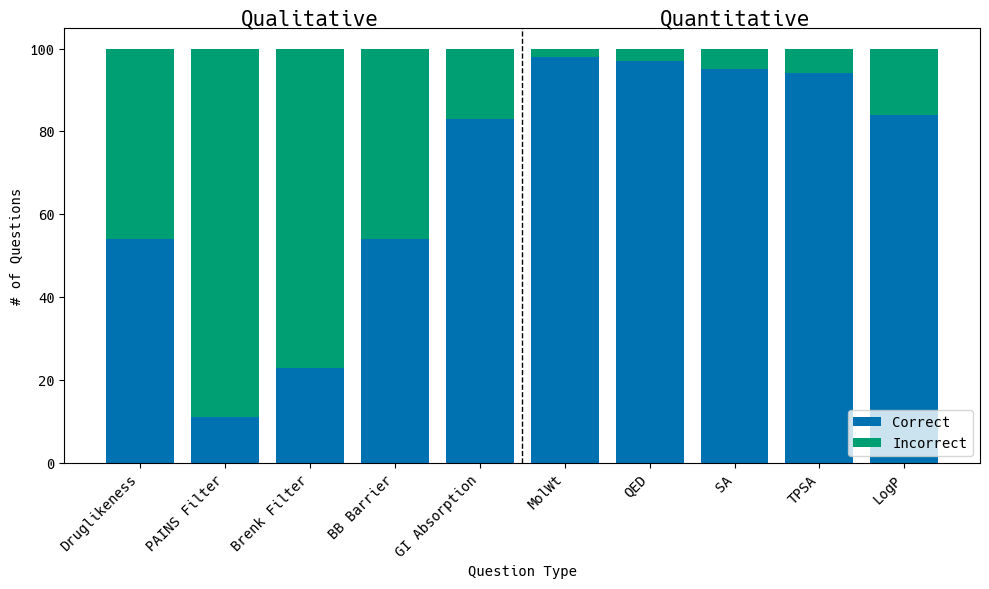

In [8]:
from matplotlib import font_manager
plt.style.use('seaborn-v0_8-colorblind')
#plt.style.use("fivethirtyeight")

font_path = '/Users/mcna892/Library/Fonts/HackNerdFont-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

# Load in the data
combined_df = pd.read_csv("Result_phi2_no_prompt_combined_a100_80.csv")
druglike = combined_df[0:100]["answer"].sum()
pain = combined_df[100:200]["answer"].sum()
brenk = combined_df[200:300]["answer"].sum()
bbb = combined_df[300:400]["answer"].sum()
gi = combined_df[400:500]["answer"].sum()
molwt = combined_df[500:600]["answer"].sum()
qed = combined_df[600:700]["answer"].sum()
sa = combined_df[700:800]["answer"].sum()
tpsa = combined_df[800:900]["answer"].sum()
logp = combined_df[900:1000]["answer"].sum()

plt.rcParams["font.family"] = "monospace"
plt.rcParams['font.monospace'] = prop.get_name()
# Define categories
categories = ["Druglikeness", "PAINS Filter", "Brenk Filter", "BB Barrier", "GI Absorption", "MolWt", "QED", "SA", "TPSA", "LogP"]

# Calculate incorrect values
incorrect = [100 - val for val in [druglike, pain, brenk, bbb, gi, molwt, qed, sa, tpsa, logp]]

# Create DataFrame
df_summary = pd.DataFrame(list(zip(categories, [druglike, pain, brenk, bbb, gi, molwt, qed, sa, tpsa, logp], incorrect)), columns = ['attribute', 'correct', 'incorrect'])

# Create stacked bar plot using matplotlib (same as before)
mid_index = (len(categories) - 1) // 2  # Integer division for center index

# Get positions for the bars (assuming equal width)
x = np.arange(len(categories))
bar_width = 1  # Adjust bar width as needed

# Plot the dashed line

plt.figure(figsize=(10, 6))
plt.axvline(x[mid_index] + bar_width / 2, color='black', linestyle='--', linewidth=1)
plt.text(2, 107, 'Qualitative', ha='center', va='center', fontsize=15)
plt.text(7, 107, 'Quantitative', ha='center', va='center', fontsize=15)

plt.bar(df_summary["attribute"], df_summary["correct"], label="Correct")
plt.bar(df_summary["attribute"], df_summary["incorrect"], bottom=df_summary["correct"], label="Incorrect")
plt.xlabel("Question Type")
plt.ylabel("# of Questions")
#plt.title("Correct vs Incorrect Responses by Attribute")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
#plt.savefig("Combined_Prompt.png",dpi=300)

# Qualitative Benchmark (500 Questions)

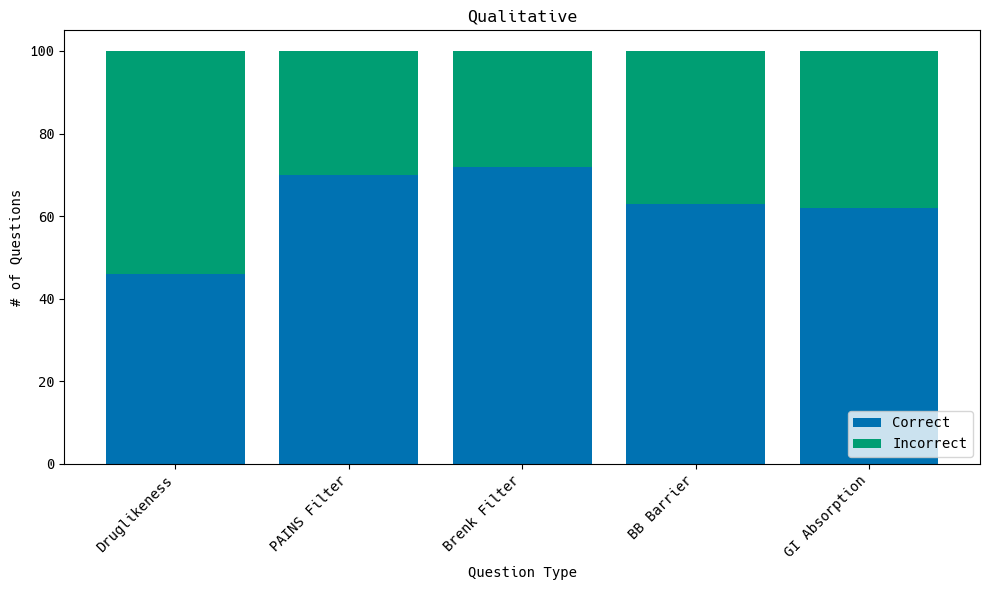

In [9]:
plt.style.use('seaborn-v0_8-colorblind')

font_path = '/Users/mcna892/Library/Fonts/HackNerdFont-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

qual_df = pd.read_csv("Result_mpt7b_prompt_qualitative_a100.csv")
druglike = qual_df[0:100]["answer"].sum()
pain = qual_df[100:200]["answer"].sum()
brenk = qual_df[200:300]["answer"].sum()
bbb = qual_df[300:400]["answer"].sum()
gi = qual_df[400:500]["answer"].sum()

plt.rcParams["font.family"] = "monospace"
plt.rcParams['font.monospace'] = prop.get_name()
# Define categories
categories = ["Druglikeness", "PAINS Filter", "Brenk Filter", "BB Barrier", "GI Absorption"]

# Calculate incorrect values
incorrect = [100 - val for val in [druglike, pain, brenk, bbb, gi]]

# Create DataFrame
df_summary = pd.DataFrame(list(zip(categories, [druglike, pain, brenk, bbb, gi], incorrect)), columns = ['attribute', 'correct', 'incorrect'])

# Create stacked bar plot using matplotlib (same as before)
mid_index = (len(categories) - 1) // 2  # Integer division for center index

# Get positions for the bars (assuming equal width)
x = np.arange(len(categories))
bar_width = 1  # Adjust bar width as needed

# Plot the dashed line

plt.figure(figsize=(10, 6))

plt.bar(df_summary["attribute"], df_summary["correct"], label="Correct")
plt.bar(df_summary["attribute"], df_summary["incorrect"], bottom=df_summary["correct"], label="Incorrect")
plt.xlabel("Question Type")
plt.ylabel("# of Questions")
plt.title("Qualitative")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
#plt.savefig("Mpt7b_prompt_quantitative.png",dpi=300)

# Quantitative Benchmark (500 Questions)

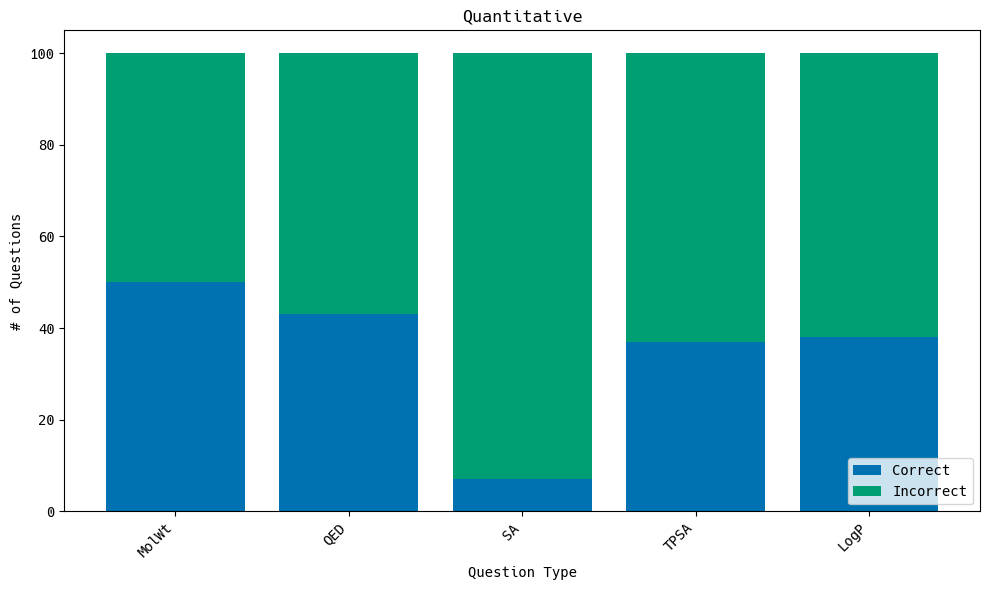

In [10]:
plt.style.use('seaborn-v0_8-colorblind')

font_path = '/Users/mcna892/Library/Fonts/HackNerdFont-Regular.ttf'  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

# Load the data
quant_df = pd.read_csv("Result_olmo1b_prompt_quantitative_dlt.csv")

molwt = quant_df[0:100]["answer"].sum()
qed = quant_df[100:200]["answer"].sum()
sa = quant_df[200:300]["answer"].sum()
tpsa = quant_df[300:400]["answer"].sum()
logp = quant_df[400:500]["answer"].sum()

plt.rcParams["font.family"] = "monospace"
plt.rcParams['font.monospace'] = prop.get_name()
# Define categories
categories = ["MolWt", "QED", "SA", "TPSA", "LogP"]

# Calculate incorrect values
incorrect = [100 - val for val in [molwt, qed, sa, tpsa, logp]]

# Create DataFrame
df_summary = pd.DataFrame(list(zip(categories, [molwt, qed, sa, tpsa, logp], incorrect)), columns = ['attribute', 'correct', 'incorrect'])

# Create stacked bar plot using matplotlib (same as before)
mid_index = (len(categories) - 1) // 2  # Integer division for center index

# Get positions for the bars (assuming equal width)
x = np.arange(len(categories))
bar_width = 1  # Adjust bar width as needed

# Plot the dashed line

plt.figure(figsize=(10, 6))
#plt.axvline(x[mid_index] + bar_width / 2, color='black', linestyle='--', linewidth=1)
#plt.text(2, 107, 'Qualitative', ha='center', va='center', fontsize=15)
#plt.text(7, 107, 'Quantitative', ha='center', va='center', fontsize=15)

plt.bar(df_summary["attribute"], df_summary["correct"], label="Correct")
plt.bar(df_summary["attribute"], df_summary["incorrect"], bottom=df_summary["correct"], label="Incorrect")
plt.xlabel("Question Type")
plt.ylabel("# of Questions")
plt.title("Quantitative")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
#plt.savefig("Mpt7b_prompt_quantitative.png",dpi=300)